[wiki свертки](https://ru.wikipedia.org/wiki/%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BA%D0%B0_%D0%BF%D0%BE%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9)

[youtube гайд](https://www.youtube.com/watch?v=8GX7yADQv2M&ab_channel=%D0%A6%D0%98%D0%A2%D0%9C%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82%D0%B0)

[scipy метод для сравнения](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html)

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [74]:
def convolve(signal, filter):
    filter = filter[::-1]
    result = list()

    for ind in range(len(signal)):
        curr = list()

        for i in range(len(filter)):
            if ind + i >= len(signal):
                continue
            curr.append(filter[i] * signal[ind + i])
        result.append(sum(curr))
    return np.array(result)

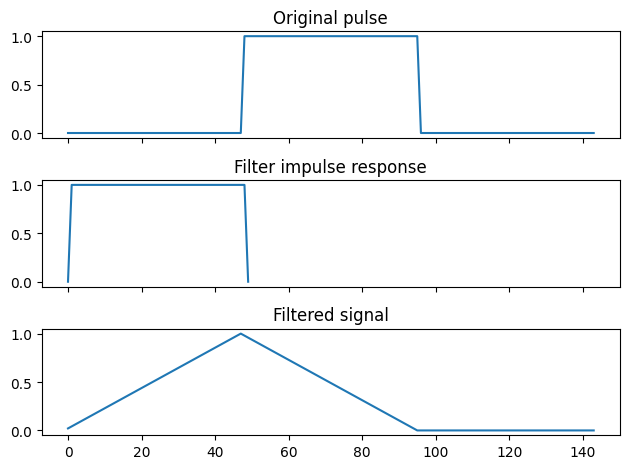

In [76]:
sig = np.repeat([0., 1., 0.], 48)
win = np.array([0.] + [1.] * 48 + [0.])
filtered = convolve(sig, win) / sum(win)

fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
fig.tight_layout()
fig.show()

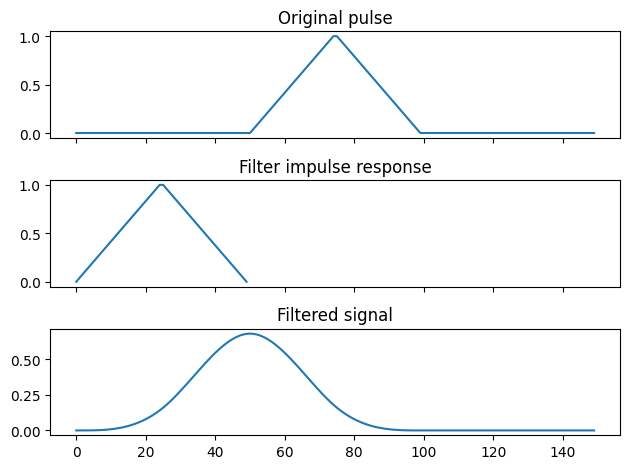

In [77]:
sig = np.concatenate((
    np.repeat(0., 50),
    np.linspace(0., 1., 25),
    np.linspace(1., 0., 25),
    np.repeat(0., 50)
), axis=None)
win = np.concatenate((
    np.linspace(0., 1., 25),
    np.linspace(1., 0., 25)
), axis=None)
filtered = convolve(sig, win) / sum(win)

fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
fig.tight_layout()
fig.show()

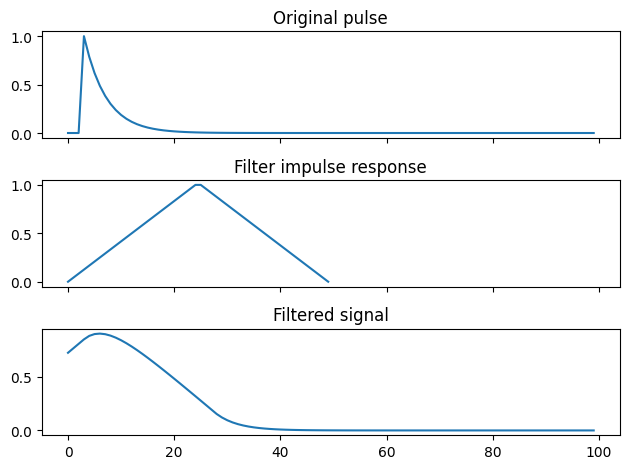

In [79]:
sig = np.concatenate((
    np.array([0., 0., 0.,]),
    np.logspace(0., -10., 97)
))
win = np.concatenate((
    np.linspace(0., 1., 25),
    np.linspace(1., 0., 25)
), axis=None)
filtered = signal.convolve(sig, win, mode='same') / sum(sig)

fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
fig.tight_layout()
fig.show()

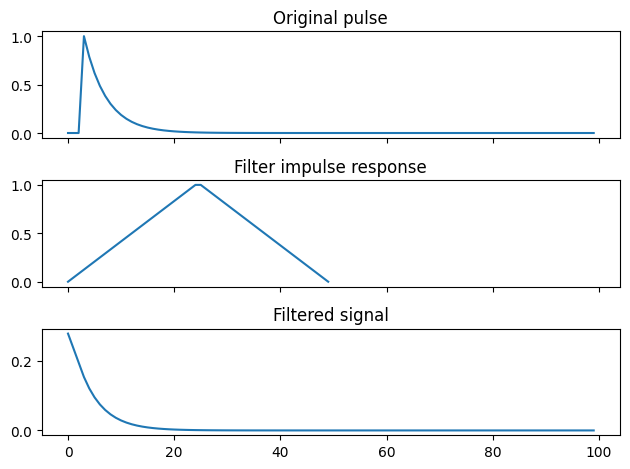

In [80]:
sig = np.concatenate((
    np.array([0., 0., 0.,]),
    np.logspace(0., -10., 97)
))
win = np.concatenate((
    np.linspace(0., 1., 25),
    np.linspace(1., 0., 25)
), axis=None)
filtered = convolve(sig, win) / sum(sig)

fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
fig.tight_layout()
fig.show()

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


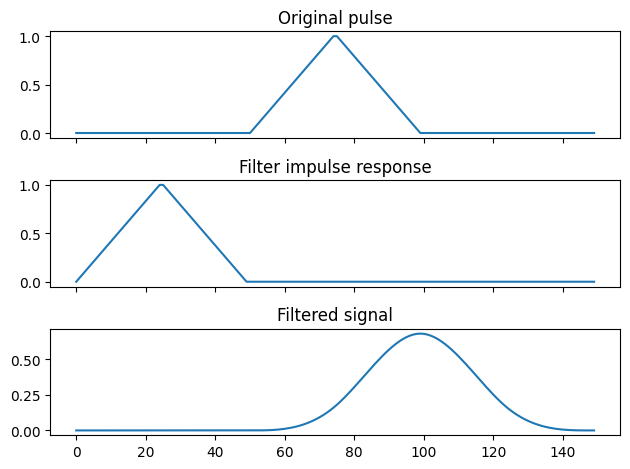

In [97]:
sig = np.concatenate((
    np.repeat(0., 50),
    np.linspace(0., 1., 25),
    np.linspace(1., 0., 25),
    np.repeat(0., 50)
), axis=None)
win = np.concatenate((
    np.linspace(0., 1., 25),
    np.linspace(1., 0., 25),
    np.repeat(0., 50),
    np.repeat(0., 50)
), axis=None)
sig_fft = np.fft.fft(sig)
win_fft = np.fft.fft(win)
filtered_fft = sig_fft * win_fft
filtered = np.fft.ifft(filtered_fft) / sum(sig)

fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
fig.tight_layout()
fig.show()